<a href="https://colab.research.google.com/github/raudh1/ShellModels/blob/main/shell_model_prove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import AnchoredText
from scipy.integrate import solve_ivp

from scipy.integrate import complex_ode
from matplotlib import pyplot

In [2]:
N=20
knn=np.power(2,np.arange(N+4))
kn=knn*np.power(2,-4.)


In [3]:
def shellmodel(t, u):
      nu=2e-6
      an=np.ones(N+4)
      bn=-0.5*np.ones(N+4)
      cn=-0.5*np.ones(N+4)
      fn=np.zeros(N+4,dtype=complex)
      #cn=np.zeros(N+4)
      #cn=(1.-bn)


      an[N+3]=0.
      an[N+2]=0.

      bn[0]=0.
      bn[N+3]=0.

      cn[0]=0.
      cn[1]=0.

      fn[3]=(1.+1.j)*8.e-1
      res=np.zeros((N+4),dtype=complex)
      #a,b,c=-1.,0.5,0.5
      #print((2,N+2),res.shape[0])

      eta=np.power(nu**3/(np.abs(fn[3])),1/4.)
      #print(1/eta)

      for i in range(2, N+2):
          #SABRA U
          #print(i)                                                                        cambiato da i-3
          #                                                                                       |
          #                                                                                       v
          res[i]=1j*(an[i]*kn[i+1]*u[i+2]*np.conjugate(u[i+1])+bn[i]*kn[i]*u[i+1]*np.conjugate(u[i-1])-cn[i]*kn[i-1]*u[i-1]*u[i-2])+fn[i]-nu*kn[i]**2*u[i] 
      return  res


In [4]:
nu=2e-6
fn=(1.+1j)*8.e-1
eta=np.power(nu**3/(np.abs(fn)),1/4.)
print(1/eta)

19392.27447486858


In [5]:
taueta=np.power(nu/np.real(fn).real,0.5)
print(taueta)

0.0015811388300841897


In [6]:
Un=1e-3*kn**(-1)*(1.+1.j)*np.ones(N+4,dtype=complex)

#u0=1j*np.ones((2*(N+4)))
u0=np.array(Un)
#u0=u0.reshape(1,2*(N+4))
#u20=2*np.ones(N)

t=0
r = complex_ode(shellmodel).set_integrator('vode', method='bdf',order='2')
r.set_initial_value(Un,0)
t1 = 6.1
dt = 1e-4
#print(r.successful(),r.t,t1)
i=0
a=[]
while r.successful() and r.t < t1:
      r.t
      a.append(r.integrate(r.t+dt))
      i=i+1
print(i)
Uf=np.transpose(a)

61001


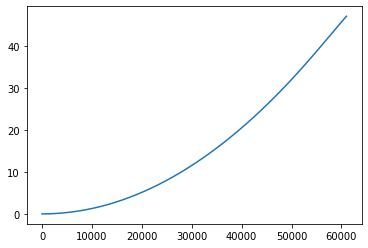

In [ ]:
Uf2=Uf[2:-2]
Energy=np.sum((Uf2*np.conj(Uf2)).real,axis=0)
plt.plot(Energy)

#plt.plot(np.sum((Un*np.conj(Un)).real,axis=0))

#plt.ylim(0,1e-3)
plt.show()

In [ ]:
#print(Energy)

In [ ]:
#print(np.mean((Uf*np.conj(Uf)),1),Uf[2].shape[:])

In [ ]:
#print(Uf.shape[:],Un.shape[:])

In [ ]:
#plt.plot(kn,(Un*np.conj(Un)).real,'bo')
#plt.loglog()
#plt.show()

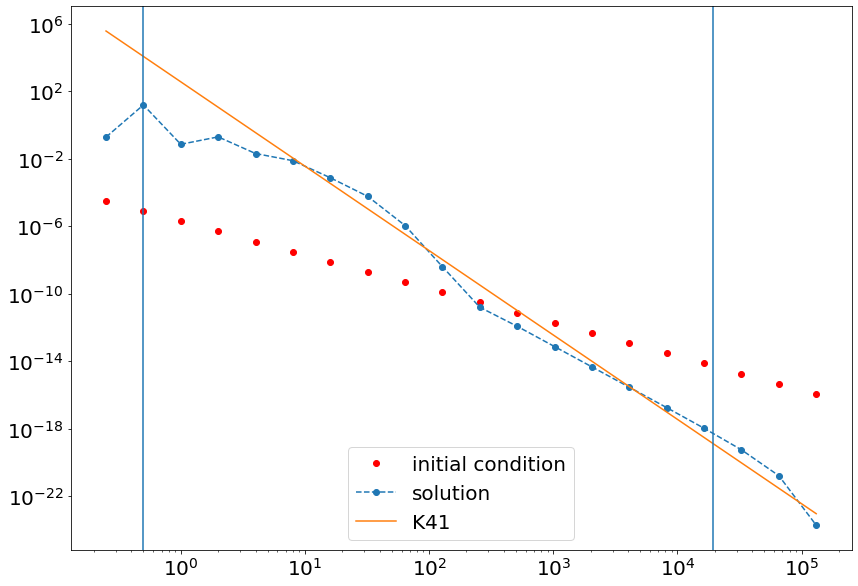

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(kn[2:-2],(Un*np.conj(Un)).real[2:-2],'ro',label='initial condition')
plt.plot(kn[2:-2],(np.mean((Uf*np.conj(Uf)),1).real)[2:-2],'o--',label='solution')
plt.plot(kn[2:-2],1e3*np.power(np.abs(fn),2/3.)*kn[2:-2]**-5/3.,label='K41')
plt.axvline(x=1/eta)
plt.axvline(x=kn[3])
#plt.xlabel(r'$k$', fontsize=20)
#plt.ylabel(r'$E(k)$', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#pyplot.annotate(r'$k_{in}$',(kn[3],1e-19),fontsize='20')
#pyplot.annotate(r'$k_{out}$',(1/eta,1e-19),fontsize='20')
plt.loglog()
plt.savefig('./K41_shell_model_N=20')
plt.show()
#np.save('./sol_0.02.npy',(np.mean((Uf*np.conj(Uf)),1).real)[2:-2])

In [ ]:
scale=1/(nu*kn)
print(scale)

[8.00000000e+06 4.00000000e+06 2.00000000e+06 1.00000000e+06
 5.00000000e+05 2.50000000e+05 1.25000000e+05 6.25000000e+04
 3.12500000e+04 1.56250000e+04 7.81250000e+03 3.90625000e+03
 1.95312500e+03 9.76562500e+02 4.88281250e+02 2.44140625e+02
 1.22070312e+02 6.10351562e+01 3.05175781e+01 1.52587891e+01
 7.62939453e+00 3.81469727e+00 1.90734863e+00 9.53674316e-01]


**structure functions in all their beauty**

In [ ]:
a=np.array([1+1j,2,3,4])
a=np.abs(a)
print(np.mean(a**2))

7.75


In [ ]:
Uf[2:-2]

array([[ 0.004     +0.004j     ,  0.004     +0.004j     ,
         0.004     +0.004j     , ..., -1.99039955+0.62669066j,
        -1.99067503+0.62678449j, -1.99095047+0.62687831j],
       [ 0.00208   +0.00208j   ,  0.00216   +0.00216j   ,
         0.00224   +0.00224j   , ...,  4.25057481+4.2404344j ,
         4.25048286+4.24033968j,  4.25039093+4.24024498j],
       [ 0.001     +0.001j     ,  0.001     +0.001j     ,
         0.001     +0.001j     , ..., -0.42484897+0.87246206j,
        -0.42479227+0.87236201j, -0.42473549+0.87226181j],
       ...,
       [ 0.00000002+0.00000002j,  0.00000002+0.00000002j,
         0.00000002+0.00000002j, ..., -0.        -0.j        ,
        -0.        -0.j        , -0.        -0.j        ],
       [ 0.00000001+0.00000001j,  0.        +0.j        ,
         0.        +0.j        , ...,  0.        -0.j        ,
         0.        -0.j        ,  0.        -0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j       

In [ ]:
print(len(np.mean(np.abs(Uf[2:-2].T),axis=0)))

20


In [ ]:
plt.figure(figsize=(14,10))
Uf3=np.abs(Uf[2:-2].T)
S1=np.mean(((Uf3)),0)
S2=np.mean((Uf3)**2,0)
S3=np.mean((Uf3)**3,0)
S4=np.mean((Uf3)**4,0)
S5=np.mean((Uf3)**5,0)
S6=np.mean((Uf3)**6,0)
S7=np.mean((Uf3)**7,0)
S8=np.mean((Uf3)**8,0)
S9=np.mean((Uf3)**9,0)
print(len(S2),len(S4)) 

20 20


<Figure size 1008x720 with 0 Axes>

In [ ]:
print((S1.shape[:]))

(20,)


In [ ]:
def func(x, a, b, c):
    return a * np.power(x,b) +c

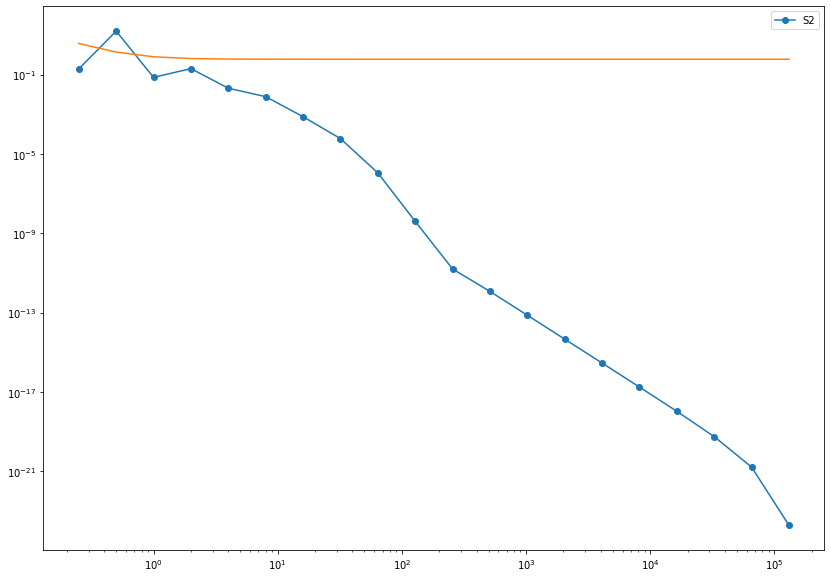

In [ ]:
plt.figure(figsize=(14,10))

#plt.plot(kn[2:-2],S1,'o-',label='S1')
plt.plot(kn[2:-2],S2,'o-',label='S2')
#plt.plot(kn[2:-2],S4,'o-',label='S4')
#plt.plot(kn[2:-2],kn[2:-2]**0.00003242,'o-',label='k**-2')
plt.plot(kn[2:-2],func(kn[2:-2], *popt))
#plt.plot(S3,'o-',label='S3')
#plt.plot(kn[2:-2],S4,'o-',label='S4')
#plt.plot(S5,'o-',label='S5')
#plt.plot(kn[2:-2],S6,'o-',label='S6')
#plt.plot(S7,'o-',label='S7')
#plt.plot(kn[2:-2],S8,'o-',label='S8')
#plt.plot(S9,'o-',label='S9')
#plt.xlim([1e-1,1])
#plt.yscale("log")
plt.loglog()#basex=2, basey=2)
plt.legend()
plt.show()

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, kn[2:-2],S2,bounds=(-5,[1,-2,1]))
popt

array([ 0.1909241 , -2.        ,  0.59000107])

In [ ]:
np.set_printoptions(suppress=True)

np.round((S2), decimals=3, out=None)

array([ 0.192, 15.383,  0.072,  0.198,  0.02 ,  0.008,  0.001,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ])

In [ ]:
--- prove ---

SyntaxError: ignored

In [ ]:
import seaborn as sns